In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data 
mxmh_df = pd.read_csv ('Resources/mxmh_survey_results.csv')


In [3]:
# View index/sort columns
mxmh_df.columns.sort_values()

Index(['Age', 'Anxiety', 'BPM', 'Composer', 'Depression', 'Exploratory',
       'Fav genre', 'Foreign languages', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Hours per day', 'Insomnia', 'Instrumentalist', 'Music effects', 'OCD',
       'Permissions', 'Primary streaming service', 'Timestamp',
       'While working'],
      dtype='object')

In [4]:
# Display data types for reference with building code
mxmh_df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [5]:
# Display columns with null values and how many
mxmh_df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [6]:
# Drop rows with null values
mxmh_clean_df = mxmh_df.dropna()
mxmh_clean_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


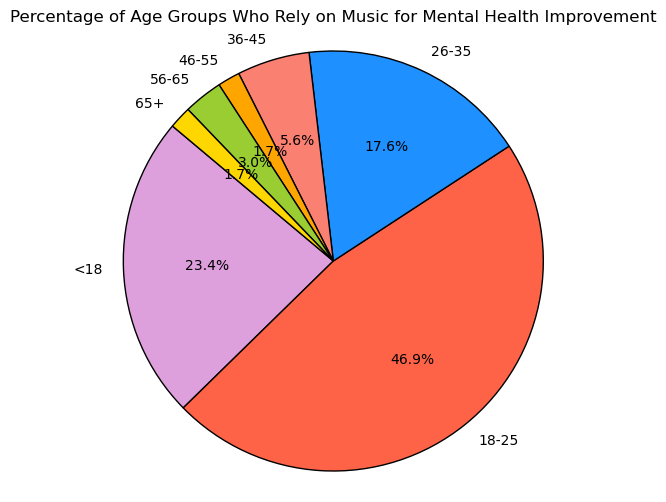

In [14]:

#1 Pie Chart: Percentage of different age demographics who report using music for mental health improvement 
# Define age bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Defining the age ranges
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']

mxmh_clean_df = mxmh_clean_df.copy()

# Create a new column 'Age Group' with the age bins
mxmh_clean_df['Age Group'] = pd.cut(mxmh_clean_df['Age'], bins=bins, labels=labels, right=False)

# Filter dataset to include only rows where 'Music effects' is 'Improve'
improvement_mxmh_df = mxmh_clean_df[mxmh_clean_df['Music effects'] == 'Improve']

# Count the number of people in each age group who rely on music for mental health improvement
age_group_counts = improvement_mxmh_df['Age Group'].value_counts().sort_index()

custom_colors=['plum', 'tomato', 'dodgerblue', 'salmon', 'orange', 'yellowgreen', 'gold']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'},
        colors=custom_colors)
plt.title('Percentage of Age Groups Who Rely on Music for Mental Health Improvement')
plt.axis('equal')
plt.show()

<Figure size 1500x900 with 0 Axes>

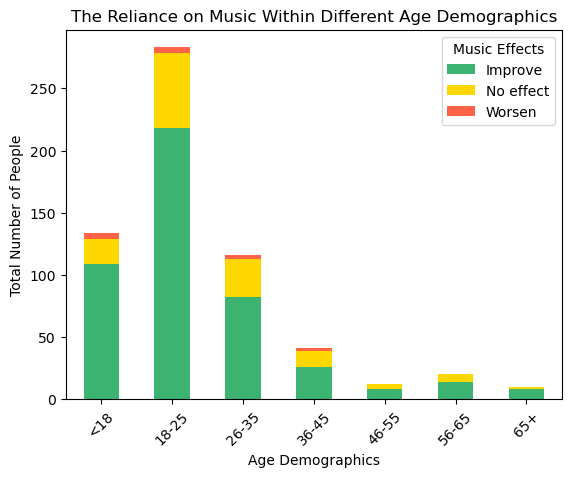

In [19]:
#1: Stacked Bar Chart: To visualize the proportion of reliance on music within different age demographics.

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+'] 

mxmh_clean_df = mxmh_clean_df.copy()


mxmh_clean_df['Age Group'] = pd.cut(mxmh_clean_df['Age'], bins=bins, labels=labels, right=False)

# Group the data by 'Age Group' and 'Music effects' to get the count for each combination
age_music_reliance_count = mxmh_clean_df.groupby(['Age Group', 'Music effects'], observed=False).size().unstack(fill_value=0)

custom_colors = ['mediumseagreen','gold','tomato']

plt.figure(figsize=(15, 9))
age_music_reliance_count.plot(kind='bar', stacked=True, color=custom_colors)
plt.title('The Reliance on Music Within Different Age Demographics')
plt.xlabel('Age Demographics')
plt.ylabel('Total Number of People')
plt.legend(title='Music Effects')
plt.xticks(rotation=45)
plt.show()

# What age demographic is most reliant on music for their mental health improvement?



In [ ]:
#2 Grouped Bar Chart: Separate bars for each genre showing both positive and negative impacts, with different colors for improvement and worsening effects.


In [ ]:
#2 Pie chart: To show the proportion of participants who report positive or negative impacts for each of the top 5 music genres.


# What top 5 music genres most affect people’s mental health (worsens or improves)?


In [ ]:
#3 Scatter Plot: To show the correlation between specific music genres and their impact on various mental health issues.


In [ ]:
#3 Clustered Bar Chart: To compare the impact of different music genres on various specific mental health issues side by side, allowing for easy comparison within each mental health issue category.


# Which music genre(s) are often correlated to a significant effect on specific mental health issues (anxiety, depression, OCD, & insomnia)?


In [ ]:
#4 Box Plot: To show the distribution of daily music intake among participants who saw an improvement in mental health.


In [ ]:
#4 Scatter Plot: Average hourly intake of music per day vs the level of reported mental health improvement to show a trend/correlation in data


# What is the average hourly intake of music per day for participants who saw an improvement in mental health?


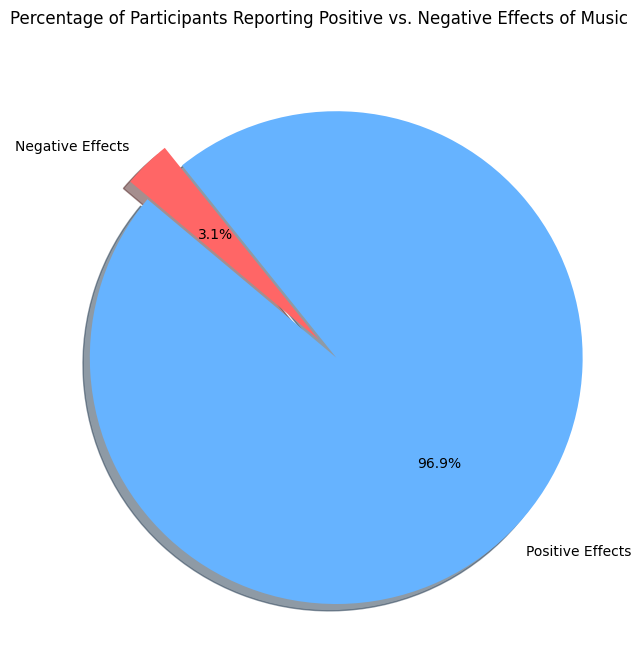

In [8]:
#5 Pie Chart: Percentage of participants who reported positive vs. negative effects.

# Calculate counts for positive and negative effects
positive_count = mxmh_clean_df[mxmh_clean_df["Music effects"] == "Improve"].shape[0]
negative_count = mxmh_clean_df[mxmh_clean_df["Music effects"] == "Worsen"].shape[0]

# Data for the pie chart
labels = ['Positive Effects', 'Negative Effects']
sizes = [positive_count, negative_count]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)  # explode the 1st slice (Positive Effects)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage of Participants Reporting Positive vs. Negative Effects of Music')
plt.show()

In [ ]:
#5 Bar Chart: Number of participants with a breakdown by those reporting improvement, no change, or deterioration in mental health.

# In conclusion, does music have a positive or negative affect on mental health?
